# Part 1: Intuition and Simulation of Basic Concepts

## Objective

In this section, you should examine the fundamental concepts of probability from both an **analytical perspective** (formulas and manual calculations) and a **computational perspective** (Monte Carlo simulation in R and visual representation).

## Note:

Use code in the analytical sections as well ( use code to implement analytical part note text! ).



## Exercise 1: Airport Security System (Law of Total Probability and Conditional Probability)


### Scenario

The airport scanning device has the following characteristics:

* $P(Object) = 0.05$
* $P(Alarm \mid Object) = 0.90$
* $P(Alarm \mid \neg Object) = 0.08$


### Steps

1. Compute $P(\text{Alarm})$ using the law of total probability.

2. Compute the conditional probability $P(\text{Object}\mid \text{Alarm})$ using Bayes' theorem.

3. Simulation in R (at least 100,000 passengers).

   * First, simulate the status of having / not having the object.
   * Then, conditionally simulate whether the alarm sounds.
   * Obtain empirical estimates of $P(\text{Alarm})$ and $P(\text{Object}\mid \text{Alarm})$.

4. Compare the analytical results and the simulation in a bar chart.

5. **Challenge:**

   * For each parameter set, compute the **empirical estimate of $P(\text{Object}\mid \text{Alarm})$** using different numbers of simulation runs (N) (for example (N=10, 100, 500, 1000, 5000, 10000)) to **demonstrate convergence of the empirical estimate to the theoretical value**.


In [4]:
# Step 1-2
P_object <- 0.05
P_alarm_given_object <- 0.90
P_alarm_given_not_object <- 0.08
P_alarm <- P_alarm_given_object * P_object +
            P_alarm_given_not_object * (1 - P_object)

P_object_given_alarm <- (P_alarm_given_object * P_object) / P_alarm

cat("Analytical results:\n")
cat("P(Alarm) =", round(P_alarm, 6), "\n")
cat("P(Object | Alarm) =", round(P_object_given_alarm, 6), "\n")


Analytical results:
P(Alarm) = 0.121 
P(Object | Alarm) = 0.371901 


In [5]:
# Step 3

set.seed(123)
N <- 100000
has_object <- rbinom(N, 1, P_object)
p_alarm_each <- ifelse(has_object == 1,P_alarm_given_object,
P_alarm_given_not_object)
alarm <- rbinom(N, 1, p_alarm_each)
emp_P_alarm <- mean(alarm)
emp_P_object_given_alarm <- sum(has_object & alarm) / sum(alarm)
cat("Empirical results (N =", N, "):\n")
cat("P(Alarm) =", round(emp_P_alarm, 6), "\n")
cat("P(Object | Alarm) =", round(emp_P_object_given_alarm, 6), "\n")


Empirical results (N = 1e+05 ):
P(Alarm) = 0.12068 
P(Object | Alarm) = 0.373384 



Attaching package: ‘ggplot2’


The following object is masked from ‘package:e1071’:

    element




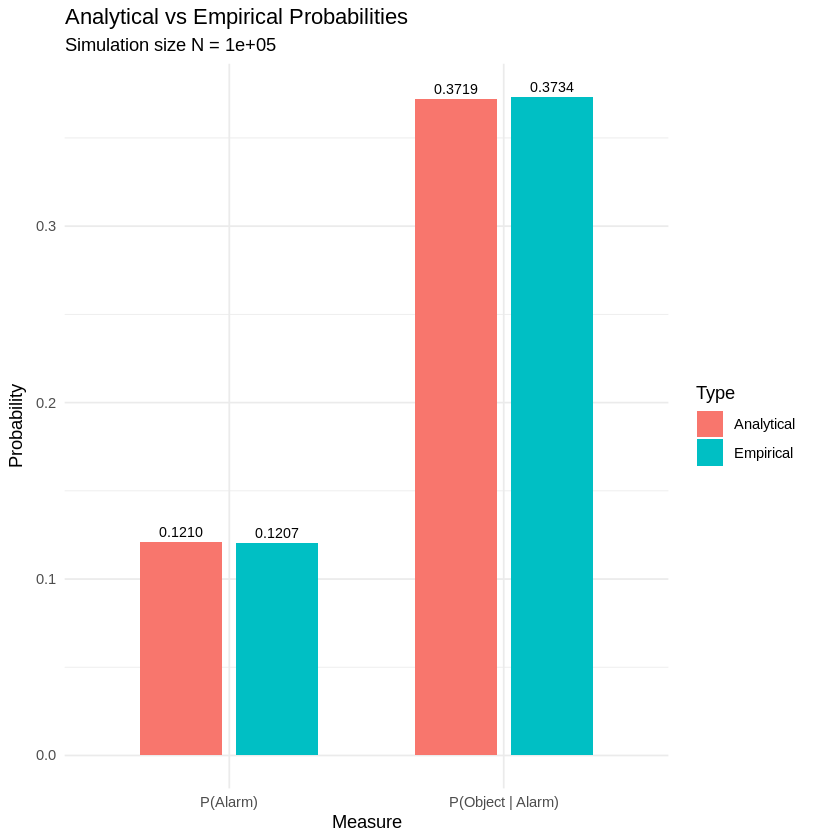

In [6]:
# Step 4

if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
library(ggplot2)

dfm <- data.frame(
  Measure = rep(c("P(Alarm)", "P(Object | Alarm)"), each = 2),
  Type = rep(c("Analytical", "Empirical"), 2),
  Probability = c(P_alarm, emp_P_alarm,
                  P_object_given_alarm, emp_P_object_given_alarm)
)

ggplot(dfm, aes(x = Measure, y = Probability, fill = Type)) +
  geom_col(position = position_dodge(width = 0.7), width = 0.6) +
  geom_text(aes(label = sprintf("%.4f", Probability)),
            position = position_dodge(width = 0.7),
            vjust = -0.5, size = 3) +
  labs(title = "Analytical vs Empirical Probabilities",
       subtitle = paste("Simulation size N =", N),
       y = "Probability") +
  theme_minimal()



      N Empirical Analytical
1 1e+01 1.0000000  0.3719008
2 1e+02 0.5000000  0.3719008
3 5e+02 0.3670886  0.3719008
4 1e+03 0.3106061  0.3719008
5 5e+03 0.3657244  0.3719008
6 1e+04 0.3599664  0.3719008
7 5e+04 0.3652360  0.3719008
8 1e+05 0.3736106  0.3719008


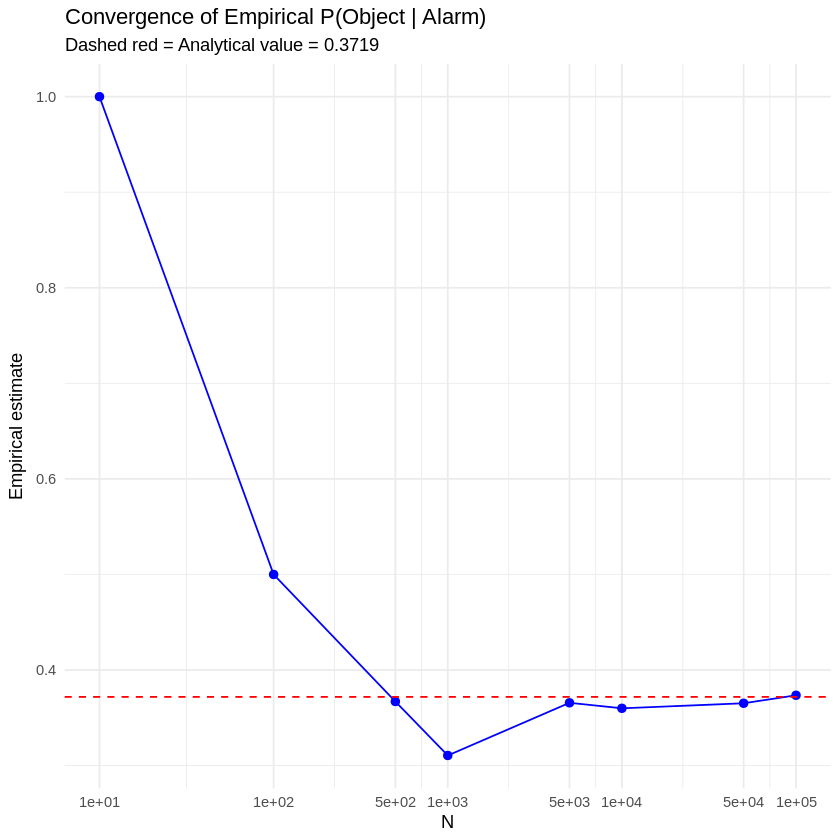

In [7]:
# Step 5

Ns <- c(10, 100, 500, 1000, 5000, 10000, 50000, 100000)
set.seed(321)

results <- data.frame()

for (Ncur in Ns) {
  has_object <- rbinom(Ncur, 1, P_object)
  p_alarm_each <- ifelse(has_object == 1, P_alarm_given_object, P_alarm_given_not_object)
  alarm <- rbinom(Ncur, 1, p_alarm_each)
  P_obj_given_alarm_emp <- sum(has_object & alarm) / sum(alarm)
  results <- rbind(results, data.frame(N = Ncur, Empirical = P_obj_given_alarm_emp))
}

results$Analytical <- P_object_given_alarm
print(results)
ggplot(results, aes(x = N, y = Empirical)) +
  geom_point(color = "blue", size = 2) +
  geom_line(color = "blue") +
  geom_hline(yintercept = P_object_given_alarm, linetype = "dashed", color = "red") +
  scale_x_log10(breaks = Ns) +
  labs(title = "Convergence of Empirical P(Object | Alarm)",
       subtitle = paste("Dashed red = Analytical value =", round(P_object_given_alarm, 4)),
       x = "N",
       y = "Empirical estimate") +
  theme_minimal()


## Exercise 2: Fraud Detection in Card Readers (Bayes’ Theorem)


### Scenario

An online store has a fraud detection system:

* $P(\text{Fraud}) = 0.02$
* $P(\text{OddCountry} \mid \text{Fraud}) = 0.70$
* $P(\text{OddCountry} \mid \neg \text{Fraud}) = 0.05$


In addition to the “OddCountry” feature, a second feature called **LargeTransactionAmount** is introduced:

* $P(\text{LargeTransactionAmount} \mid \text{Fraud}) = 0.60$
* $P(\text{LargeTransactionAmount} \mid \neg \text{Fraud}) = 0.10$


### Steps

1. **Analytical Calculation:**

   * Use Bayes’ theorem to calculate: if a transaction comes from an odd country, what is the probability of fraud?

2. **Dataset Simulation:**

   * Create a synthetic dataset of 200,000 transactions in R.
   * For each transaction, generate a “Fraud/No Fraud” label.
   * Conditionally simulate the features “OddCountry” and “LargeTransactionAmount.”
   * Compute the empirical probability $P(\text{Fraud} \mid \text{OddCountry})$ from the simulated data.

3. **Comparison:**

   * Compare analytical and empirical results using a bar chart.

4. **Challenge 1 – Naive Bayes with Two Features:**

   * Assume the features are independent and calculate:
     $$
     P(\text{Fraud} \mid \text{OddCountry}, \text{LargeTransactionAmount})
     $$
   * Estimate this probability empirically from the dataset and compare it to the theoretical value.

5. **Challenge 2 – Convergence Analysis:**

   * For $P(\text{Fraud} \mid \text{OddCountry}, \text{LargeTransactionAmount})$:

     * Run simulations with different sample sizes (N) (e.g., 1000, 5000, 10000, 50000, 100000, 200000).
     * Plot a graph showing how the empirical probability converges to the theoretical value.

6. **Challenge 3 – Sensitivity Analysis:**

   * Examine transactions that are both from an odd country **and** have a large transaction amount, and determine the probability of fraud.


In [8]:
# 1
p_fraud <- 0.02
p_odd_if_fraud <- 0.70
p_odd_if_no <- 0.05
p_large_if_fraud <- 0.60
p_large_if_no <- 0.10
p_odd <- p_odd_if_fraud * p_fraud + p_odd_if_no * (1 - p_fraud)
p_fraud_given_odd <- (p_odd_if_fraud * p_fraud) / p_odd

cat("Analytical results:\n")
cat("P(OddCountry) =", round(p_odd, 6), "\n")
cat("P(Fraud | OddCountry) =", round(p_fraud_given_odd, 6), "\n")


Analytical results:
P(OddCountry) = 0.063 
P(Fraud | OddCountry) = 0.222222 


In [9]:
################################
# 2. Code for Dataset Simulation
################################


p_fraud <- 0.02
p_odd_if_fraud <- 0.70
p_odd_if_no <- 0.05

p_large_if_fraud <- 0.60
p_large_if_no <- 0.10

set.seed(123)
N <- 200000

fraud_label <- rbinom(N,1,p_fraud)

odd_country <- integer(N)
large_amount <- integer(N)
idx_fraud <- which(fraud_label==1)
idx_no <- which(fraud_label==0)

odd_country[idx_fraud] <- rbinom(length(idx_fraud),1,p_odd_if_fraud)
odd_country[idx_no] <- rbinom(length(idx_no),1,p_odd_if_no)

large_amount[idx_fraud] <- rbinom(length(idx_fraud),1,p_large_if_fraud)
large_amount[idx_no] <- rbinom(length(idx_no),1,p_large_if_no)

df <- data.frame(Fraud=fraud_label,
                 OddCountry=odd_country,
                 LargeAmount=large_amount)

Empirical P(Fraud | OddCountry) = 0.220676 


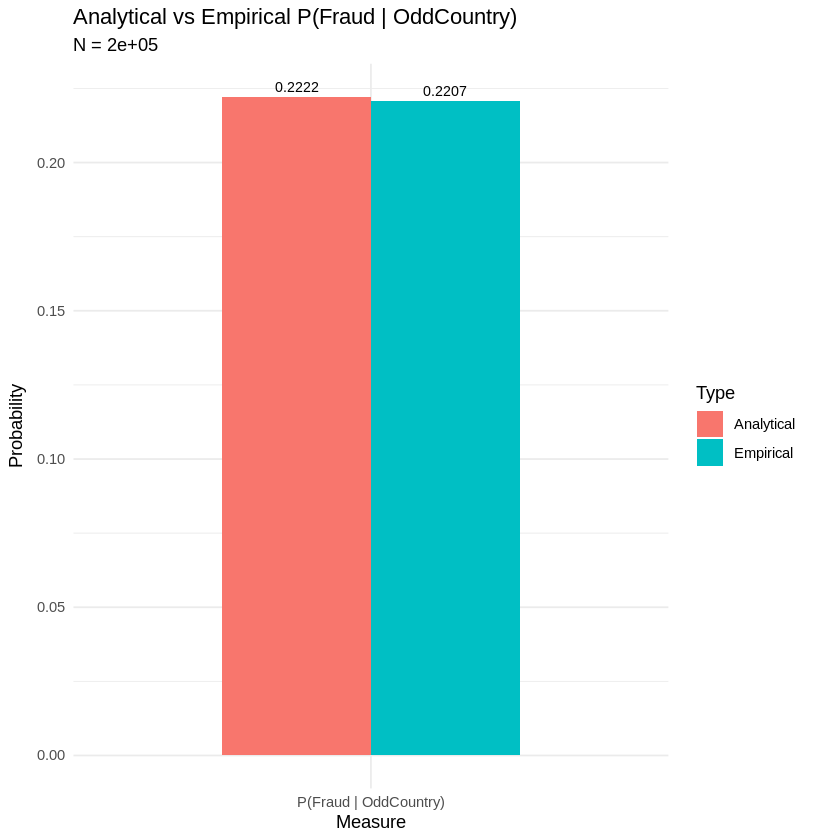

In [10]:
# 3.

emp_p_fraud_given_odd <- mean(df$Fraud[df$OddCountry == 1])
cat("Empirical P(Fraud | OddCountry) =", round(emp_p_fraud_given_odd, 6), "\n")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
library(ggplot2)
dfm <- data.frame(
  Measure = c("P(Fraud | OddCountry)"),
  Analytical = p_fraud_given_odd,
  Empirical = emp_p_fraud_given_odd
)
df_long <- data.frame(
  Measure = rep("P(Fraud | OddCountry)", 2),
  Type = c("Analytical", "Empirical"),
  Probability = c(p_fraud_given_odd, emp_p_fraud_given_odd)
)
ggplot(df_long, aes(x = Measure, y = Probability, fill = Type)) +
  geom_col(position = "dodge", width = 0.6) +
  geom_text(aes(label = sprintf("%.4f", Probability)),
            position = position_dodge(0.6), vjust = -0.5, size = 3) +
  labs(title = "Analytical vs Empirical P(Fraud | OddCountry)",
       subtitle = paste("N =", N),
       y = "Probability") +
  theme_minimal()


In [11]:
# 4

p_joint_odd_large <- (p_odd_if_fraud * p_large_if_fraud * p_fraud) +
(p_odd_if_no * p_large_if_no * (1 - p_fraud))
p_fraud_given_odd_large <- (p_odd_if_fraud * p_large_if_fraud * p_fraud) /
                           p_joint_odd_large
cat("Analytical P(Fraud | OddCountry & LargeAmount) =",
    round(p_fraud_given_odd_large, 6), "\n")
subset_idx <- which(df$OddCountry == 1 & df$LargeAmount == 1)
emp_p_fraud_given_odd_large <- mean(df$Fraud[subset_idx])

cat("Empirical P(Fraud | OddCountry & LargeAmount) =",
    round(emp_p_fraud_given_odd_large, 6), "\n")


Analytical P(Fraud | OddCountry & LargeAmount) = 0.631579 
Empirical P(Fraud | OddCountry & LargeAmount) = 0.619734 


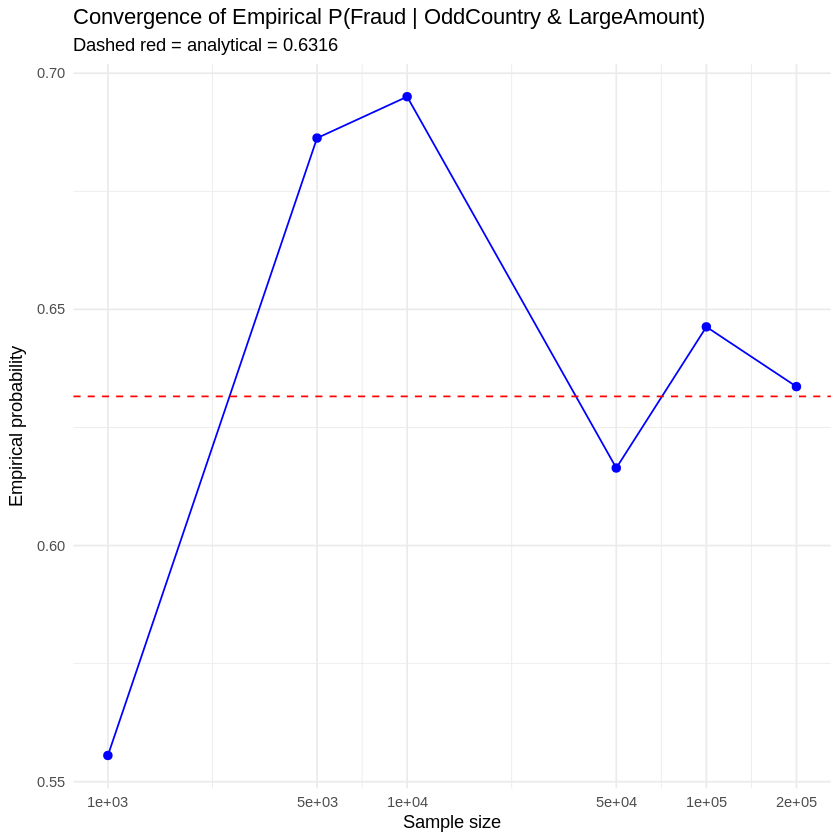

In [12]:
# 5
Ns <- c(1000, 5000, 10000, 50000, 100000, 200000)
set.seed(999)
results <- data.frame()
for (Ncur in Ns) {
  fraud <- rbinom(Ncur, 1, p_fraud)
  odd <- ifelse(fraud == 1,rbinom(Ncur, 1, p_odd_if_fraud),rbinom(Ncur, 1, p_odd_if_no))
  large <- ifelse(fraud == 1,
                  rbinom(Ncur, 1, p_large_if_fraud),
                  rbinom(Ncur, 1, p_large_if_no))
  idx <- which(odd == 1 & large == 1)
  emp_val <- mean(fraud[idx])
  results <- rbind(results, data.frame(N = Ncur, Empirical = emp_val))
}
results$Analytical <- p_fraud_given_odd_large
library(ggplot2)
ggplot(results, aes(x = N, y = Empirical)) +
  geom_point(color = "blue", size = 2) +
  geom_line(color = "blue") +
  geom_hline(yintercept = p_fraud_given_odd_large,color = "red", linetype = "dashed") +
  scale_x_log10(breaks = Ns) +
  labs(title = "Convergence of Empirical P(Fraud | OddCountry & LargeAmount)",subtitle = paste("Dashed red = analytical =", round(p_fraud_given_odd_large, 4)),
       x = "Sample size", y = "Empirical probability") +
  theme_minimal()


In [13]:
# 6
df_focus <- subset(df, OddCountry == 1 & LargeAmount == 1)

n_total <- nrow(df_focus)
n_fraud <- sum(df_focus$Fraud)

cat("Number of such transactions:", n_total, "\n")
cat("Number of frauds among them:", n_fraud, "\n")
cat("Empirical P(Fraud | OddCountry & LargeAmount) =",
    round(n_fraud / n_total, 6), "\n")


Number of such transactions: 2706 
Number of frauds among them: 1677 
Empirical P(Fraud | OddCountry & LargeAmount) = 0.619734 


# Part 2: Intuitive and Classic Problems with Simulation

## **Objective:** Deepen statistical intuition and observe the power of computers for performing numerous simulations.


## 1. Monty Hall Problem


### **Scenario**

There is a TV game show with three doors. Behind one door is a prize, and the other two doors are empty. The player first chooses a door. The host (Monty), who knows what is behind each door, opens one of the empty doors and asks the player whether they want to switch their choice or stay with the original door.


### **Steps**

1. **Analytical Analysis using Conditional Probability:** Calculate the probability of winning if the player **switches** versus **stays** with the original choice.

2. **Simulation in R (10,000 runs):**

   * Randomly select the winning door.
   * Simulate the player’s decision to switch or stay.
   * Estimate the probability of winning in each scenario.

3. **Comparison:** Compare analytical and simulation results and plot a bar chart to illustrate the differences.


In [14]:
#1
P_stay_analytic <- 1/3
P_switch_analytic <- 2/3
cat("Analytical probabilities:\n")
cat("P(win | stay)   =", round(P_stay_analytic, 6), "\n")
cat("P(win | switch) =", round(P_switch_analytic, 6), "\n")


Analytical probabilities:
P(win | stay)   = 0.333333 
P(win | switch) = 0.666667 


In [15]:
#2
set.seed(2025)
N <- 10000
win_if_stay <- logical(N)
win_if_switch <- logical(N)
for(i in 1:N){
  prize <- sample(1:3,1)
  choice <- sample(1:3,1)
  win_if_stay[i] <- (choice == prize)
  if(choice == prize){
    win_if_switch[i] <- FALSE
  } else {
    win_if_switch[i] <- TRUE
  }
}

emp_stay <- mean(win_if_stay)
emp_switch <- mean(win_if_switch)

cat("P(win | stay)   =", round(emp_stay,6), "\n")
cat("P(win | switch) =", round(emp_switch,6), "\n")


P(win | stay)   = 0.3334 
P(win | switch) = 0.6666 


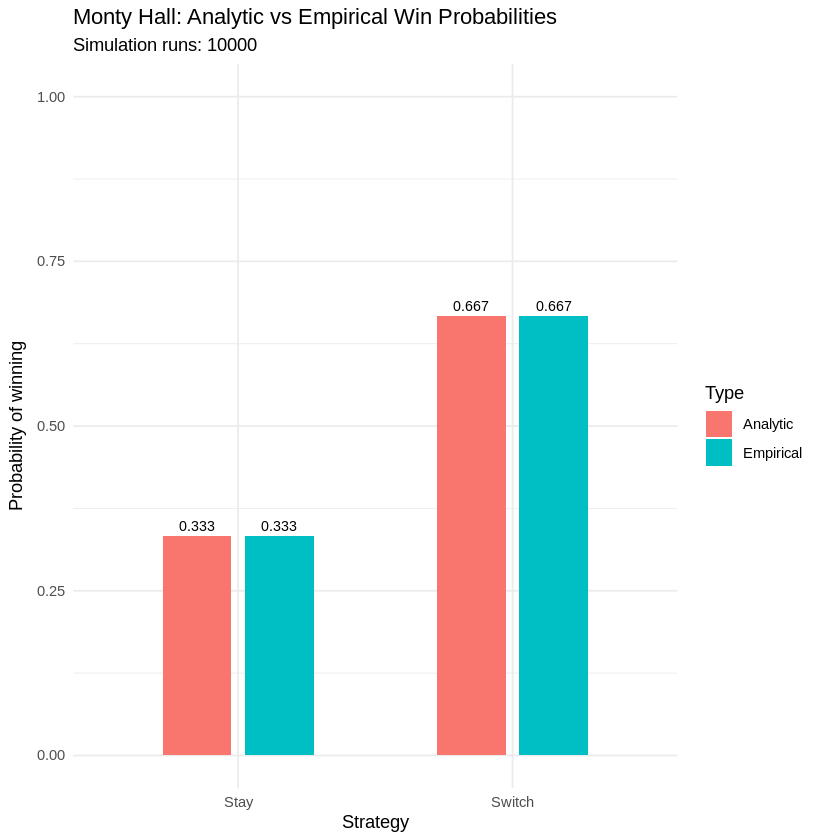

In [16]:
#3
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
library(ggplot2)

df_plot <- data.frame(
  Strategy = rep(c("Stay", "Switch"), each = 2),
  Type = rep(c("Analytic", "Empirical"), 2),
  Probability = c(P_stay_analytic, emp_stay, P_switch_analytic, emp_switch)
)

ggplot(df_plot, aes(x = Strategy, y = Probability, fill = Type)) +
  geom_col(position = position_dodge(width = 0.6), width = 0.5) +
  geom_text(aes(label = sprintf("%.3f", Probability)),
            position = position_dodge(width = 0.6), vjust = -0.5, size = 3) +
  ylim(0,1) +
  labs(title = "Monty Hall: Analytic vs Empirical Win Probabilities",
       subtitle = paste("Simulation runs:", N),
       y = "Probability of winning") +
  theme_minimal()


## 2. Infinite Monkey Theorem


### **Scenario**

Suppose a monkey is sitting at a keyboard, pressing keys completely at random. We want to determine how long it takes for a specific word (e.g., "STAT" or "LOVE") to appear among these random sequences.


### **Steps**

**Simulation in R:**

1. Generate 1,000,000 random strings of length 4 using letters from the English alphabet.

**Empirical Probability:**

* Count how many times the target word appears exactly and compare it with the theoretical probability.

**Cumulative Probability:**

* Examine how the probability of the word appearing at least once grows as the number of strings increases (e.g., 10, 100, 1,000, 10,000, …).

**Intuitive Analysis:**

* Show why the event is almost impossible in a small simulation, but with large-scale simulations (millions of trials), the probability of occurrence becomes noticeably higher.


Target word: STAT 
Empirical probability (1 million trials): 0 
Theoretical probability: 2.19e-06 
Number of matches: 0 



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


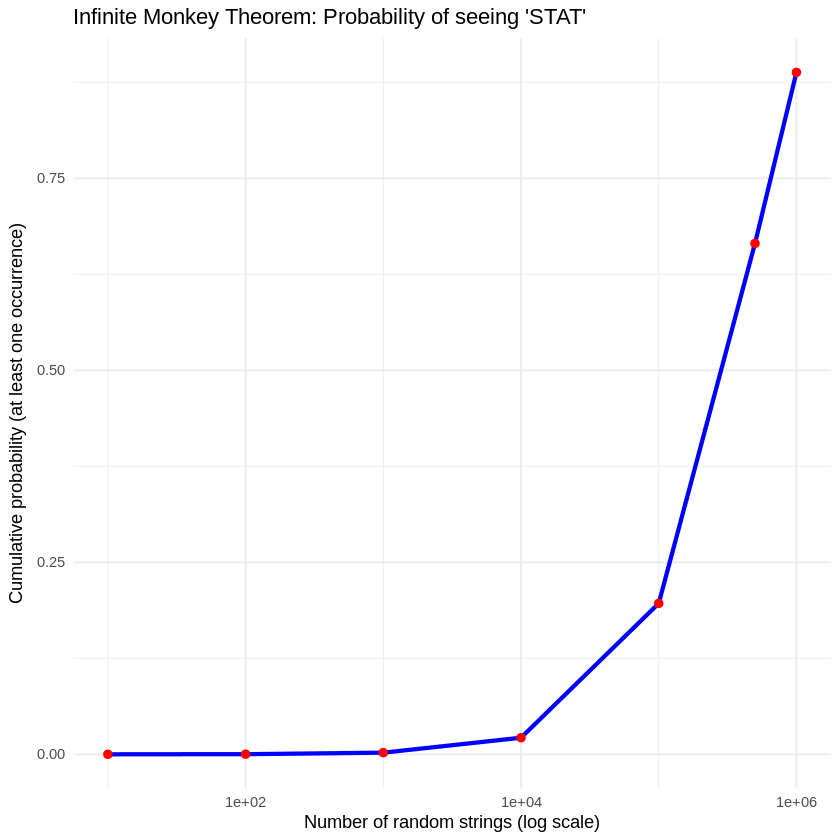

In [17]:
set.seed(2025)
N <- 1000000
word_length <- 4
target_word <- "STAT"
alphabet <- LETTERS
random_strings <- replicate(N, paste0(sample(alphabet, word_length, replace = TRUE), collapse = ""))
matches <- sum(random_strings == target_word)
empirical_prob <- matches / N
theoretical_prob <- (1/26)^word_length
cat("Target word:", target_word, "\n")
cat("Empirical probability (1 million trials):", round(empirical_prob, 8), "\n")
cat("Theoretical probability:", round(theoretical_prob, 8), "\n")
cat("Number of matches:", matches, "\n\n")
check_points <- c(10, 100, 1000, 10000, 100000, 500000, 1000000)
cum_prob <- sapply(check_points, function(k) {
  sum(random_strings[1:k] == target_word) > 0
})
cum_prob_est <- 1 - (1 - theoretical_prob)^check_points
if(!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
library(ggplot2)

df_plot <- data.frame(
  Strings = check_points,
  Probability = cum_prob_est
)

ggplot(df_plot, aes(x = Strings, y = Probability)) +
  geom_line(color = "blue", size = 1.2) +
  geom_point(color = "red", size = 2) +
  scale_x_log10() +
  labs(title = paste("Infinite Monkey Theorem: Probability of seeing '", target_word, "'", sep=""),
       x = "Number of random strings (log scale)",
       y = "Cumulative probability (at least one occurrence)") +
  theme_minimal()


# Part 3: Modern Application – Bayesian Classification


## **Scenario**

In this section, our goal is **spam email detection**.
Each email has a label:

* **1 (Spam):** Spam email
* **0 (Not Spam):** Non-spam email

We aim to use a **Naive Bayes Classifier** to determine whether a new email is spam or not.


## **Steps**

* You can use the **tm**, **SnowballC**, **tidyverse**, **e1071** and **caret** libraries.


In [ ]:
# Load required libraries
install.packages("tm")


library(tm)


In [19]:
install.packages("SnowballC")
library(SnowballC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [21]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate()    masks ggplot2::annotate()
✖ ggplot2::element() masks e1071::element()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::lift()      masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [22]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Step 1: Data Preprocessing

* The data is in the file `emails.csv` (or a similar dataset can be used).

* Each row contains the content of an email and its label.

* The text needs to be preprocessed:

  * Remove punctuation
  * Convert all words to **lowercase**
  * Remove **stopwords** (words like "and", "the", "is")
  * Apply **stemming** or **lemmatization**

* Finally, each email should be converted into features that indicate whether each word is present in the text or not (0/1).

Tip: You can use R libraries for preprocessing, such as **tm** and **SnowballC**.


In [23]:
install.packages("googledrive")
library(googledrive)

drive_auth()




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No
Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c899e32be8314f0a0109a080c664499f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWIzMmo5MDZyRnR3UWhQTUQzSDNaSzY0RHphMnBXWU5lbmlwM1BoV1VqeGtPZE91a2tWZ1VpQ0RkY29HVHhENm1Wb290QSIsInN0YXRlIjoiYzg5OWUzMmJlODMxNGYwYTAxMDlhMDgwYzY2NDQ5OWYifQ==


In [ ]:
install.packages("readr")
library(readr)

In [ ]:
drive_download("emails.csv", path = "emails.csv", overwrite = TRUE)


In [ ]:
# ------------------------------------------------------
# Step 1: Load and preprocess data
# ------------------------------------------------------

# Step 1: Load dataset
emails <- read.csv("emails.csv", stringsAsFactors = FALSE)

# Assuming dataset has two columns: "text" and "spam"
head(emails)

# Step 2: Create a text corpus
corpus <- VCorpus(VectorSource(emails$text))

# Step 3: Preprocessing
corpus <- tm_map(corpus, content_transformer(tolower))           # Convert to lowercase
corpus <- tm_map(corpus, removePunctuation)                      # Remove punctuation
corpus <- tm_map(corpus, removeNumbers)                          # Remove numbers
corpus <- tm_map(corpus, removeWords, stopwords("english"))      # Remove stopwords
corpus <- tm_map(corpus, stripWhitespace)                        # Remove extra whitespace
corpus <- tm_map(corpus, stemDocument)                           # Perform stemming (optional)

# Step 4: Create Document-Term Matrix (binary: 0/1 features)
dtm <- DocumentTermMatrix(corpus, control = list(weighting = weightBin))

# Step 5: Convert DTM to dataframe and attach labels
data_features <- as.data.frame(as.matrix(dtm))
data_features$spam <- emails$spam

# Check result
str(data_features)
table(data_features$spam)



### Step 2: Data Splitting

The data is divided into two parts:

* **Training set:** Used to calculate probabilities $P(y)$ and $P(x_i \mid y)$.
* **Test set:** Used to evaluate the model on new, unseen data.

Goal: Obtain a reliable and accurate estimate of the model’s performance on unseen data.


In [ ]:
# -------------------------------
# Step 2: Split data into train/test
# -------------------------------

set.seed(123) # For reproducibility

# 80% training, 20% testing
train_index <- sample(1:nrow(data_features), 0.8 * nrow(data_features))

train_data <- data_features[train_index, ]
test_data  <- data_features[-train_index, ]

# Check dimensions of train and test sets
cat("Training set size:", nrow(train_data), "\n")
cat("Test set size:", nrow(test_data), "\n")

table(train_data$spam)
table(test_data$spam)

### Step 3: Building the Bag of Words (BoW) Model

* In the **Bag of Words** approach, each word in the vocabulary becomes a feature.
* The feature value represents either the **count** of the word in the text or simply its **presence/absence**.
* The BoW matrix is constructed as follows:

  * Each row = one email
  * Each column = one word
  * Values = word count in the email

Example:

| Sentence                                             | like | this | food | restaurant | was | good | behavior | staff |
| ---------------------------------------------------- | ---- | ---- | ---- | ---------- | --- | ---- | -------- | ----- |
| Sentence 1: "I liked the food from this restaurant." | 1    | 1    | 1    | 1          | 1   | 0    | 0        | 0     |
| Sentence 2: "The staff's behavior was not good."     | 0    | 0    | 0    | 0          | 0   | 1    | 1        | 1     |

* Finally, the BoW matrix is built for all emails in the dataset.


In [ ]:
# -------------------------------
# Step 3: Build Bag of Words (BoW)
# -------------------------------

# Create Document-Term Matrix with term frequency (not binary)
dtm_bow <- DocumentTermMatrix(corpus)

# Convert DTM to dataframe
bow_matrix <- as.data.frame(as.matrix(dtm_bow))

# Add labels
bow_matrix$spam <- emails$spam

# Inspect the structure
str(bow_matrix)

# Example: first few rows of BoW matrix
head(bow_matrix[, 1:10])  # show first 10 words as columns


### Step 4: Training the Naive Bayes Model

* Using the BoW data and labels, compute the conditional probabilities:

$$
P(y) = \frac{\text{Number of emails in class } y}{\text{Total number of emails}}
$$

$$
P(x_i \mid y) = \frac{\text{Number of emails in class } y \text{ containing word } i}{\text{Number of emails in class } y}
$$

* For a new email, make a prediction using Bayes’ rule:

$$
\hat{y} = \arg\max_y ; P(y) \prod_{i=1}^D P(x_i \mid y)
$$

* To avoid zero probabilities, apply **Laplace Smoothing**:

$$
P(x_i \mid y) = \frac{\text{count}(x_i, y) + 1}{\text{count}(y) + |V|}
$$

where $|V|$ is the total number of words in the vocabulary.

**Important:** Do not use a pre-built Naive Bayes model; implement the calculations manually.


In [ ]:
library(tm)
library(SnowballC)
library(tidyverse)
library(e1071)
library(caret)

emails <- read.csv("emails.csv", stringsAsFactors = FALSE)
head(emails)

corpus <- VCorpus(VectorSource(emails$text))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("english"))
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, stemDocument)

dtm <- DocumentTermMatrix(corpus, control = list(weighting = weightBin))
data_features <- as.data.frame(as.matrix(dtm))
data_features$spam <- emails$spam

set.seed(123)
train_index <- sample(1:nrow(data_features), 0.8 * nrow(data_features))
train_data <- data_features[train_index, ]
test_data  <- data_features[-train_index, ]

P_spam <- mean(train_data$spam == 1)
P_not_spam <- 1 - P_spam
spam_count <- sum(train_data$spam == 1)
not_spam_count <- sum(train_data$spam == 0)

get_conditional_probs <- function(class_data, total_class_count, vocab_size) {
  word_freq <- colSums(class_data)
  prob_x_given_y <- (word_freq + 1) / (total_class_count + vocab_size)
  return(prob_x_given_y)
}

spam_data <- train_data[train_data$spam == 1, -ncol(train_data)]
not_spam_data <- train_data[train_data$spam == 0, -ncol(train_data)]
vocab_size <- ncol(train_data) - 1

P_x_given_spam <- get_conditional_probs(spam_data, spam_count, vocab_size)
P_x_given_not_spam <- get_conditional_probs(not_spam_data, not_spam_count, vocab_size)

predict_naive_bayes <- function(new_email, P_spam, P_not_spam, P_x_given_spam, P_x_given_not_spam) {
  log_p_spam <- log(P_spam)
  log_p_not_spam <- log(P_not_spam)
  log_likelihood_spam <- sum(log(P_x_given_spam[new_email == 1]))
  log_likelihood_not_spam <- sum(log(P_x_given_not_spam[new_email == 1]))
  log_p_spam_final <- log_p_spam + log_likelihood_spam
  log_p_not_spam_final <- log_p_not_spam + log_likelihood_not_spam
  if (log_p_spam_final > log_p_not_spam_final) {
    return(1)
  } else {
    return(0)
  }
}

predictions <- apply(test_data[, -ncol(test_data)], 1, function(row) {
  predict_naive_bayes(row, P_spam, P_not_spam, P_x_given_spam, P_x_given_not_spam)
})

accuracy <- mean(predictions == test_data$spam)
cat("Accuracy: ", accuracy, "\n")


### Step 5: Calculating Accuracy on Test Data

* Compute the **accuracy** of the model on the test dataset:

$$
\text{Accuracy} = \frac{\text{Number of correctly predicted emails}}{\text{Total number of emails in the test set}}
$$


In [ ]:

conf_matrix <- table(Predicted = predictions, Actual = test_data$spam)
print(conf_matrix)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Accuracy of the Naive Bayes model: ", round(accuracy, 4), "\n")
conf_matrix_caret <- confusionMatrix(factor(predictions), factor(test_data$spam))
print(conf_matrix_caret)

## Challenges and Questions

1. **Unseen Words:**
   If a word does not appear in the BoW:

2. **Very Small Probabilities:**
   Since probabilities get extremely small when multiplied, use **log probabilities**:

$$
\log P(y \mid X) \propto \log P(y) + \sum_i \log P(x_i \mid y)
$$

3. **Stopwords:**
   * does removeing them have good effect or not?

4. **Model Evaluation:**

   * Compute **accuracy** on the test set.
   * Compare with a pre-built R model, e.g., `e1071::naiveBayes`.
   * Which performs better? Explain the reason for any differences.

5. **Appropriate Metrics:**

   * Is accuracy alone sufficient for evaluating model quality? Explore other evaluation methods and metrics in your code.
   * Suggested metrics: F1 score, confusion matrix, precision, recall, etc.


In [ ]:
# -------------------------------
# Part 6: Evaluation with e1071::naiveBayes
# -------------------------------
library(e1071)
train_X <- train_data[, -ncol(train_data)]
train_y <- train_data$spam

test_X <- test_data[, -ncol(test_data)]
test_y <- test_data$spam

train_y_factor <- factor(train_y, levels=c(0,1))

nb_model <- naiveBayes(x = train_X, y = train_y_factor)

pred_e1071 <- predict(nb_model, newdata = test_X)


pred_e1071_num <- as.numeric(as.character(pred_e1071))

accuracy_e1071 <- mean(pred_e1071_num == test_y)
cat("Test Accuracy (e1071 Naive Bayes):", accuracy_e1071, "\n")


In [ ]:
# -------------------------------
# Extra Evaluation Metrics
# -------------------------------

# Function to compute evaluation metrics from confusion matrix
compute_metrics <- function(true, pred, model_name="Model") {
  tab <- table(Predicted = pred, Actual = true)

  # Extract confusion matrix components
  TP <- ifelse(!is.na(tab["1","1"]), tab["1","1"], 0)
  TN <- ifelse(!is.na(tab["0","0"]), tab["0","0"], 0)
  FP <- ifelse(!is.na(tab["1","0"]), tab["1","0"], 0)
  FN <- ifelse(!is.na(tab["0","1"]), tab["0","1"], 0)

  # Compute metrics
  accuracy  <- (TP + TN) / (TP + TN + FP + FN)
  precision <- ifelse((TP + FP) == 0, NA, TP / (TP + FP))
  recall    <- ifelse((TP + FN) == 0, NA, TP / (TP + FN))
  f1        <- ifelse(is.na(precision) | is.na(recall) | (precision+recall)==0, NA,
                      2 * precision * recall / (precision + recall))

  # Print results
  cat("=== ", model_name, " ===\n")
  print(tab)
  cat(sprintf("Accuracy : %.4f\n", accuracy))
  cat(sprintf("Precision (spam=1): %.4f\n", precision))
  cat(sprintf("Recall    (spam=1): %.4f\n", recall))
  cat(sprintf("F1-score  (spam=1): %.4f\n\n", f1))

  # Return as data frame for comparison
  return(data.frame(Model=model_name, Accuracy=accuracy,
                    Precision=precision, Recall=recall, F1=f1))
}

# -------------------------------
# Run evaluation for both models
# -------------------------------

res_manual <- compute_metrics(test_y, predictions, "Manual Naive Bayes")
res_e1071  <- compute_metrics(test_y, pred_e1071_num, "e1071 Naive Bayes")

# Combine results into a single summary table
results <- rbind(res_manual, res_e1071)
print(results)
